In [42]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import re
import joblib


In [43]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [44]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [45]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [46]:
  fake['class']= 0
  true['class']= 1

In [47]:
data = pd.concat([fake,true],axis=0)

In [48]:
data = data.drop(["title","subject","date"],axis=1)

In [49]:

data['text'][0]

,text
0,Donald Trump just couldn t wish all Americans ...
0,WASHINGTON (Reuters) - The head of a conservat...


In [50]:
data.reset_index(inplace=True)
data.drop(["index"],axis=1,inplace=True)

In [51]:
data.sample(5)

,text,class
5994,With Donald Trump s clear and obvious racism o...,0
21623,It s painful to watch the stupidity and irresp...,0
21339,Politically correct racism condoned by the Lef...,0
18682,Watch this hilarious video from our British co...,0
9722,"Last week, after the New York Giants player Od...",0


In [52]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)  # Remove text within brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'(?<!\w)[%s](?!\w)' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)  # Remove newline characters
    return text

In [53]:
data["text"] = data["text"].apply(clean_text)

In [54]:
len(data)


44898

In [55]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [56]:
from sklearn.model_selection import train_test_split
x=data["text"]
y=data["class"]

xtrain , xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [57]:
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(xtrain)
xv_test = vectorizer.transform(xtest)

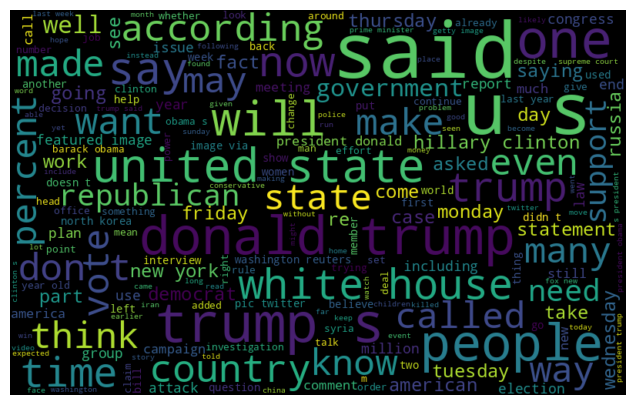

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'text' is the column containing the text data
all_words = ' '.join(data['text'].astype(str).tolist())  # Combine all text into a single string

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [59]:
lr = LogisticRegression()
lr.fit(xv_train,ytrain)

LogisticRegression()

In [60]:
prediction = lr.predict(xv_test)
lr.score(xv_test,ytest)

0.985924276169265

In [61]:
from sklearn.ensemble import RandomForestClassifier # Importing the RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report # Importing necessary metrics functions

# Assuming xv_train, ytrain, xv_test, ytest are your training and testing data
X_train_vec = xv_train
y_train = ytrain
X_test_vec = xv_test
y_test = ytest

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)
rf_pred = rf_classifier.predict(X_test_vec)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.98913140311804
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.99      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [62]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences


# Assuming you have your text data in a variable called 'all_text'
# For example, you can get it from your DataFrame like this:
all_text = ' '.join(data['text'].astype(str).tolist())

# 1. Create a Tokenizer instance
tokenizer = Tokenizer()
tokenizer.fit_on_texts([all_text])
vocab_size = len(tokenizer.word_index)
embedding_matrix = np.zeros((vocab_size + 1, 100)) # Replace 100 with your embedding dimension

# Now you can create the model
model = Sequential([
    Embedding(vocab_size + 1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

# Convert text data to sequences
xtrain_sequences = tokenizer.texts_to_sequences(xtrain)
xtest_sequences = tokenizer.texts_to_sequences(xtest)

# Pad sequences to have the same length
max_length = 100  # You might need to adjust this based on your data
xtrain_padded = pad_sequences(xtrain_sequences, maxlen=max_length, padding='post', truncating='post')
xtest_padded = pad_sequences(xtest_sequences, maxlen=max_length, padding='post', truncating='post')

# Compile the model before training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Added compile step

history = model.fit(xtrain_padded, ytrain, epochs=10, batch_size=256, validation_data=(xtest_padded, ytest))

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 88s 644ms/step - accuracy: 0.5204 - loss: 0.6926 - val_accuracy: 0.5252 - val_loss: 0.6919
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 137s 608ms/step - accuracy: 0.5216 - loss: 0.6925 - val_accuracy: 0.5252 - val_loss: 0.6922
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 85s 631ms/step - accuracy: 0.5206 - loss: 0.6925 - val_accuracy: 0.5252 - val_loss: 0.6919
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 137s 592ms/step - accuracy: 0.5184 - loss: 0.6926 - val_accuracy: 0.5252 - val_loss: 0.6919
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 94s 680ms/step - accuracy: 0.5204 - loss: 0.6924 - val_accuracy: 0.5252 - val_loss: 0.6920
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 130s 588ms/step - accuracy: 0.5203 - loss: 0.6925 - val_accuracy: 0.5252 - val_loss: 0.6919
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 78s 589ms/step - accuracy: 0.5263 - loss: 0.6919 - val_accuracy: 0.5252 - val_loss: 0.6921
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 602ms/step - accuracy: 0.5238 - loss

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed 'accuracy' to ['accuracy']
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 100)            │      13,323,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,474,429 (51.40 MB)

 Trainable params: 150,529 (588.00 KB)

 Non-trainable params: 13,323,900 (50.83 MB)

In [1]:
def save_model(vectorizer, model):
    import joblib
    joblib.dump(vectorizer, 'vectorizer.jb')
    joblib.dump(model, 'model.jb')